In [3]:
#!pip install --upgrade numpy
#pip install --upgrade scikit-learn

<b> Tiroid Kanseri Risk Veri Seti Kullanılara Kanseri Tahmin etme (Sınıflandırma)

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
import seaborn

In [86]:
import sklearn
print(sklearn.__version__)

1.3.2


<b> Hangi Veri Setini Kullandım?
- ‘Tiroid Kanseri Risk Veri Seti’ isimli veri setini kullandım.
- Kaggle’dan ulaştım.
- Veri seti; 12.761 satır, 17 sütundan oluşmaktadır.
- Eksik değer 1 satırda vardır.
- Bu veri seti, 15 yıllık bir süre boyunca toplandı ve her hasta en az 10 yıl takip edildi.
 <br><br>
    
<b>   Hangi Algoritmayı Kullandım?
- Random Forest Algoritmasını kullandım.
     <br><br>
    
<b> Hangi Analizleri Yaptım?
- Model doğruluğunu çeşitli metrikler ile hesapladım.
- Pasta grafiği, histogram gibi çeşitli grafikler çizdirerek hastaların kanser riskleri, yaşları ile kanser olup olmama durumları gibi durumları analiz ettim.


In [87]:
tyroiddata=pd.read_csv("thyroid_cancer_risk_data.csv")

In [88]:
np.shape(tyroiddata)

(12761, 17)

In [89]:
tyroiddata.head(10)

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
5,6,89,Male,UK,African,No,No,No,Yes,Yes,No,4.00,0.98,5.52,0.02,Medium,Benign
6,7,89,Female,South Korea,Asian,Yes,Yes,No,No,Yes,No,4.70,0.62,11.73,0.01,High,Malignant
7,8,38,Female,India,African,No,No,No,No,No,No,5.54,3.49,9.47,4.30,Medium,Benign
8,9,17,Female,Russia,African,No,Yes,No,No,No,Yes,2.30,2.60,11.89,0.81,High,Malignant
9,10,36,Male,Germany,Asian,No,No,No,No,Yes,No,1.34,0.56,4.51,1.44,Low,Benign


In [90]:
tyroid_data=tyroiddata.drop("Patient_ID",axis=1)

In [91]:
np.shape(tyroid_data)

(12761, 16)

In [92]:
tyroid_data.head(5)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [93]:
tyroid_data.tail(100)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
12661,26,Female,India,Asian,Yes,Yes,No,No,Yes,No,9.03,2.18,10.99,1.29,High,Malignant
12662,52,Male,Nigeria,Middle Eastern,No,No,No,No,No,No,3.98,1.01,5.16,2.32,Medium,Benign
12663,81,Female,Brazil,Caucasian,No,No,No,No,No,No,0.29,2.83,6.50,2.22,Low,Benign
12664,80,Male,China,Caucasian,No,Yes,No,Yes,No,No,6.31,0.56,5.94,2.99,Low,Benign
12665,66,Male,Japan,Asian,Yes,No,No,No,No,No,2.43,2.67,8.22,3.52,High,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,52,Female,Nigeria,Hispanic,No,Yes,No,No,No,Yes,5.23,2.40,11.51,0.22,Medium,Benign
12757,34,Male,Nigeria,African,Yes,No,No,Yes,No,No,2.88,0.85,8.14,0.70,Low,Benign
12758,58,Female,Nigeria,African,No,No,Yes,Yes,No,Yes,8.03,1.49,8.17,1.65,Low,Benign
12759,65,Female,India,Middle Eastern,No,No,No,Yes,No,No,8.42,0.67,6.56,4.30,Medium,Benign


In [94]:
tyroid_data.isnull().sum()

Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    1
Diagnosis              1
dtype: int64

In [95]:
np.shape(tyroid_data)

(12761, 16)

In [96]:
tyroid_data.drop([12760],inplace=True)

In [97]:
tyroid_data.isnull().sum()

Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [98]:
np.shape(tyroid_data)

(12760, 16)

In [99]:
tyroid_data=tyroid_data.replace(to_replace=["Yes","No"],value=[1,0]) 

#tyroid_data.loc[:,"Family_History"]=tyroid_data["Family_History"].map({'Yes':1,'No':0})

In [100]:
print(tyroid_data['Gender'].unique())

['Male' 'Female']


In [101]:
tyroid_data=tyroid_data.replace(to_replace=["Male","Female"],value=[1,0])

In [102]:
print(tyroid_data['Gender'].unique())

[1 0]


In [103]:
np.unique(tyroid_data["Country"])

array(['Brazil', 'China', 'Germany', 'India', 'Japan', 'Nigeria',
       'Russia', 'South Korea', 'UK', 'USA'], dtype=object)

In [104]:
tyroid_data=tyroid_data.replace(['Brazil', 'China', 'Germany', 'India', 'Japan', 'Nigeria',
       'Russia', 'South Korea', 'UK', 'USA'],value=[1,2,3,4,5,6,7,8,9,10])

In [105]:
np.unique(tyroid_data["Thyroid_Cancer_Risk"])

array(['High', 'Low', 'Medium'], dtype=object)

In [106]:
tyroid_data=tyroid_data.replace(['High', 'Low', 'Medium'],value=[1,2,3])

In [107]:
np.unique(tyroid_data["Ethnicity"])

array(['African', 'Asian', 'Caucasian', 'Hispanic', 'Middle Eastern'],
      dtype=object)

In [108]:
tyroid_data=tyroid_data.replace(['African', 'Asian', 'Caucasian', 'Hispanic', 'Middle Eastern'],value=[1,2,3,4,5])

In [109]:
print(tyroid_data.dtypes)

Age                      int64
Gender                   int64
Country                  int64
Ethnicity                int64
Family_History           int64
Radiation_Exposure       int64
Iodine_Deficiency        int64
Smoking                  int64
Obesity                  int64
Diabetes                 int64
TSH_Level              float64
T3_Level               float64
T4_Level               float64
Nodule_Size            float64
Thyroid_Cancer_Risk      int64
Diagnosis               object
dtype: object


In [110]:
np.unique(tyroid_data["Diagnosis"])

array(['Benign', 'Malignant'], dtype=object)

In [111]:
tyroid_data=tyroid_data.replace(['Benign', 'Malignant'],value=[1,2])

In [112]:
tyroid_data.head(9)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,1,7,3,0,1,0,0,0,0,9.37,1.67,6.16,1.08,2,1
1,29,1,3,4,0,1,0,0,0,0,1.83,1.73,10.54,4.05,2,1
2,86,1,6,3,0,0,0,0,0,0,6.26,2.59,10.57,4.61,2,1
3,75,0,4,2,0,0,0,0,0,0,4.10,2.62,11.04,2.46,3,1
4,35,0,3,1,1,1,0,0,0,0,9.10,2.11,10.71,2.11,1,1
5,89,1,9,1,0,0,0,1,1,0,4.00,0.98,5.52,0.02,3,1
6,89,0,8,2,1,1,0,0,1,0,4.70,0.62,11.73,0.01,1,2
7,38,0,4,1,0,0,0,0,0,0,5.54,3.49,9.47,4.30,3,1
8,17,0,7,1,0,1,0,0,0,1,2.30,2.60,11.89,0.81,1,2


In [113]:
tyroid_data["Thyroid_Cancer_Risk"].value_counts()

2    6550
3    4289
1    1921
Name: Thyroid_Cancer_Risk, dtype: int64

In [114]:
risks=tyroid_data["Thyroid_Cancer_Risk"].value_counts()
grup_names = ['low', 'medium', 'high']
risk_group_count=pd.DataFrame({"grup names":[grup_names[i-1] for i in risks.index],"risks":risks.values})
risk_group_count

,grup names,risks
0,medium,6550
1,high,4289
2,low,1921


<br><b>Sınıf dağılımlarına bakarak dengeli dağılıp dağılmadığını gözlemleyelim:<br>


In [115]:
tyroid_data["Diagnosis"].value_counts()

1    9770
2    2990
Name: Diagnosis, dtype: int64

<b>Çok büyük oranda bir dengesizlik yok.

In [116]:
x=tyroid_data.iloc[:,0:15]
x

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk
0,66,1,7,3,0,1,0,0,0,0,9.37,1.67,6.16,1.08,2
1,29,1,3,4,0,1,0,0,0,0,1.83,1.73,10.54,4.05,2
2,86,1,6,3,0,0,0,0,0,0,6.26,2.59,10.57,4.61,2
3,75,0,4,2,0,0,0,0,0,0,4.10,2.62,11.04,2.46,3
4,35,0,3,1,1,1,0,0,0,0,9.10,2.11,10.71,2.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,66,0,1,3,0,0,0,0,1,1,3.55,2.01,11.17,2.84,2
12756,52,0,6,4,0,1,0,0,0,1,5.23,2.40,11.51,0.22,3
12757,34,1,6,1,1,0,0,1,0,0,2.88,0.85,8.14,0.70,2
12758,58,0,6,1,0,0,1,1,0,1,8.03,1.49,8.17,1.65,2


In [117]:
y=tyroid_data.iloc[:,-1] #y=tyroid_data["Diagnosis"]
y

0        1
1        1
2        1
3        1
4        1
        ..
12755    1
12756    1
12757    1
12758    1
12759    1
Name: Diagnosis, Length: 12760, dtype: int64

In [118]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42) #

<b> Modelimizi kuralım:
 

In [119]:
forest_model=RandomForestClassifier(n_estimators=100, max_depth= 15, min_samples_split=11, random_state=42) 

<b> Modelimizi eğitelim:

In [120]:
forest_model.fit(x_train,y_train)
y_prediction=forest_model.predict(x_test)  

In [121]:
print("accuracy value:",sk.metrics.accuracy_score(y_test,y_prediction)) 

accuracy value: 0.8270637408568443


n_estimators=2 iken --->accuracy value 0.7723354231974922

n_estimators=50 iken --->accuracy value 0.8138714733542319

n_estimators=100, test_size=0.2 iken --->accuracy value 0.8162225705329154 / n_estimators=100, test_size=0.3 iken --->accuracy value 0.8223615464994776 / n_estimators=100,  max_depth= 15, test_size=0.3 iken --->accuracy value 0.8247126436781609

n_estimators=100, max_depth= 15, min_samples_split=11, test_size=0.3 iken --->accuracy value 0.8270637408568443

n_estimators=150 iken --->accuracy value 0.8158307210031348

n_estimators=200 iken --->accuracy value 0.8158307210031348

"min_samples_leaf=2" parametresi doğruluk değerini düşürdü...

GridSearchCV veya RandomizedSearchCV kullanarak model parametreleri daha iyi optimize edilebilir...

In [122]:
print("precision value:", sk.metrics.precision_score(y_test,y_prediction))

precision value: 0.8533210332103321


<b> bizim için çok önemli bir metrik:

In [123]:
print("recall value:", sk.metrics.recall_score(y_test,y_prediction)) #sesitivity

recall value: 0.9375


In [124]:
print("f1 score value:", sk.metrics.f1_score(y_test,y_prediction))

f1 score value: 0.8934320669671605


✔ Sensitivity (Recall - Duyarlılık): Gerçek pozitifleri doğru tahmin etme oranıdır, yani tüm gerçek hastaların kaçını hasta olarak tahmin ettiğimizi gösterir.

✔ Specificity (Özgüllük): Gerçek negatifleri doğru tahmin etme oranıdır, yani sağlıklı bireyleri yanlışlıkla hasta olarak sınıflandırma ihtimalimizin ne kadar düşük olduğunu gösterir.

✔ Precision (Kesinlik): Pozitif tahminlerimizin ne kadarının gerçekten doğru olduğunu gösterir, yani modelin "hasta" dediği bireylerin ne kadarının gerçekten hasta olduğunu ölçer.

✔ F1 Score: Precision ve Recall'un dengeli bir ortalamasıdır, özellikle dengesiz veri setlerinde önemli olup hem yanlış pozitifleri hem de yanlış negatifleri dikkate alır.

✔ Accuracy (Doğruluk): Modelin tüm verilerde ne kadar doğru tahmin yaptığını gösterir, ancak dengesiz veri setlerinde yanıltıcı olabilir.

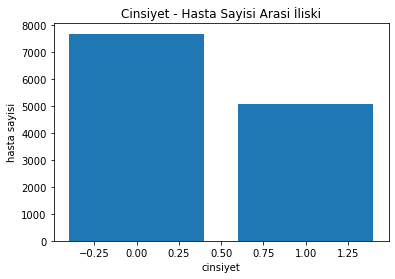

In [125]:
cins=tyroid_data['Gender'].value_counts()
bar=plt.bar(cins.index,cins.values ) #np.shape(tyroid_data)

plt.xlabel("cinsiyet")
plt.ylabel("hasta sayisi")
plt.title("Cinsiyet - Hasta Sayisi Arasi İliski")
plt.show()

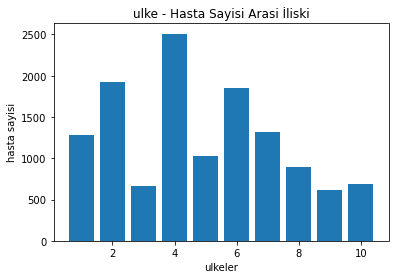

In [126]:
country_counts = tyroid_data['Country'].value_counts()

plt.bar(country_counts.index, country_counts.values)
plt.xlabel("ulkeler")
plt.ylabel("hasta sayisi")
plt.title("ulke - Hasta Sayisi Arasi İliski")
plt.show()
#'Brazil', 'China', 'Germany', 'India', 'Japan', 'Nigeria','Russia', 'South Korea', 'UK', 'USA' ->ulkeler

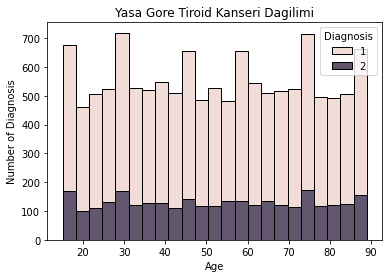

In [127]:
seaborn.histplot(data=tyroid_data, x='Age', hue='Diagnosis', multiple="stack") # hue= renk tonu (Diagnosis'e gore farkli renklerde gosterir)
#multiple="stack" -> gruplandirilmis verileri ust uste yigar. 
plt.xlabel("Age")
plt.ylabel("Number of Diagnosis")
plt.title("Yasa Gore Tiroid Kanseri Dagilimi")
plt.show()

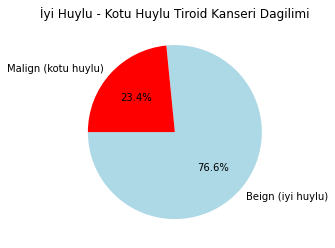

In [128]:
diagnosis_counts = tyroid_data["Diagnosis"].value_counts()
label=["Beign (iyi huylu)","Malign (kotu huylu)"]

plt.pie(diagnosis_counts, labels=label , autopct='%1.1f%%', startangle=180, colors=['lightblue', 'red'])
plt.title("İyi Huylu - Kotu Huylu Tiroid Kanseri Dagilimi")
plt.show()

In [129]:
type(y_prediction)

numpy.ndarray

In [130]:
y_pred_df=pd.DataFrame(y_prediction)

In [131]:
y_pred_df.value_counts()

1    3252
2     576
dtype: int64

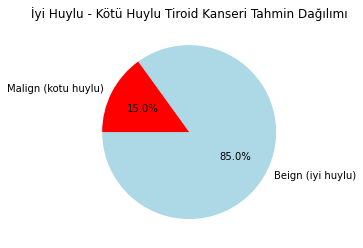

In [132]:
pred_counts=y_pred_df.value_counts()
label=["Beign (iyi huylu)","Malign (kotu huylu)"]

plt.pie(pred_counts, labels=label , autopct='%1.1f%%', startangle=180, colors=['lightblue', 'red'])
plt.title("İyi Huylu - Kötü Huylu Tiroid Kanseri Tahmin Dağılımı")
plt.show()

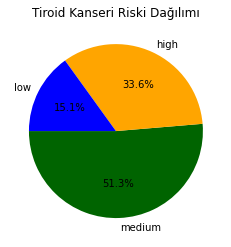

In [133]:
label=["medium","high","low"]

plt.pie(risks, labels=label , autopct='%1.1f%%', startangle=180, colors=['darkgreen', 'orange','blue'])
plt.title("Tiroid Kanseri Riski Dağılımı")
plt.show()

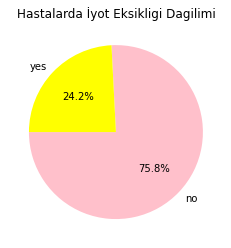

In [134]:
Iodine_def=tyroid_data["Iodine_Deficiency"].value_counts()
label=["no","yes"]

plt.pie(Iodine_def, labels=label , autopct='%1.1f%%', startangle=180, colors=['pink', 'yellow'])
plt.title("Hastalarda İyot Eksikligi Dagilimi")
plt.show()

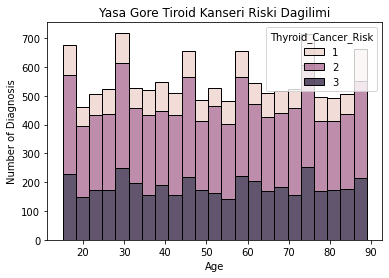

In [135]:
seaborn.histplot(data=tyroid_data, x='Age', hue='Thyroid_Cancer_Risk', multiple="stack") # hue= renk tonu (Diagnosis'e gore farkli renklerde gosterir)
#multiple="stack" -> gruplandirilmis verileri ust uste yigar. 
plt.xlabel("Age")
plt.ylabel("Number of Diagnosis")
plt.title("Yasa Gore Tiroid Kanseri Riski Dagilimi")
plt.show()